In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import sklearn as sk
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define consistent color scheme: Dark colors (navy, teal, burgundy)
custom_palette = ['#001f3f', '#0074D9', '#7FDBCA', '#B10DC9']
bmi_colors = {'Underweight': '#001f3f', 'Normal': '#7FDBCA', 'Overweight': '#0074D9', 'Obese': '#B10DC9'}
sns.set_palette(custom_palette)

#checking data loaded correctly, showing first few rows and info

df = pd.read_csv("Data/insurance.csv")
print(df.head())
print(df.info())

#checking for missing values
print(df.isnull().sum())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: i

C:\Users\cowar\AppData\Local\Temp\ipykernel_20212\764039047.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\cowar\AppData\Local\Temp\ipykernel_20212\764039047.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



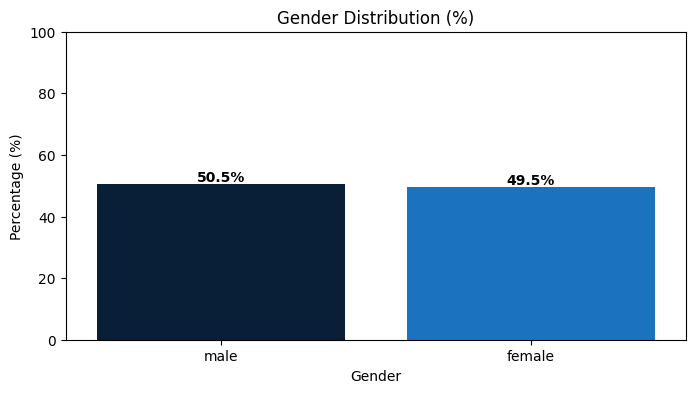

C:\Users\cowar\AppData\Local\Temp\ipykernel_20212\764039047.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




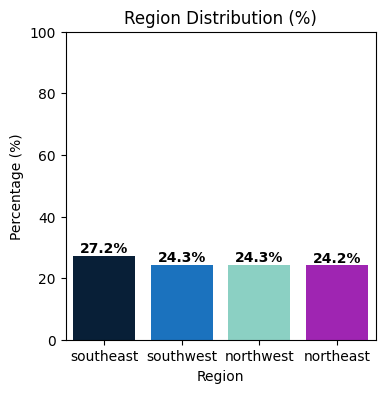

In [11]:

#gender distribution by percentage
gender_pct = (df['sex'].value_counts() / len(df) * 100)
plt.figure(figsize=(8, 4))
sns.barplot(x=gender_pct.index, y=gender_pct.values, palette=custom_palette)
plt.title('Gender Distribution (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
for i, v in enumerate(gender_pct.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')
plt.show()

#region distribution by percentage
region_pct = (df['region'].value_counts() / len(df) * 100)
plt.figure(figsize=(4,4))
sns.barplot(x=region_pct.index, y=region_pct.values, palette=custom_palette)
plt.title('Region Distribution (%)')
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
for i, v in enumerate(region_pct.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')
plt.show()


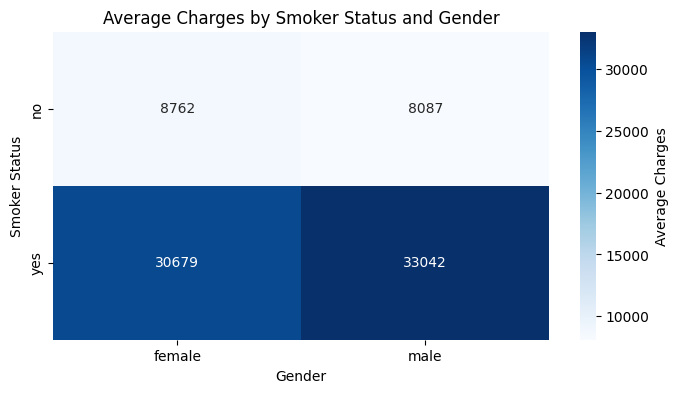

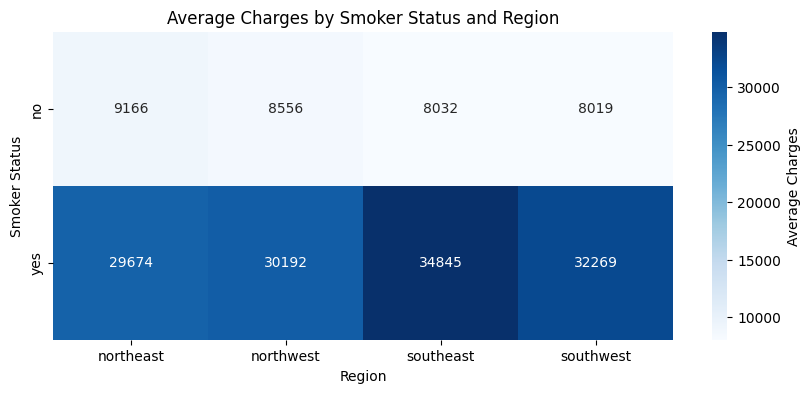

In [12]:

#heatmap for charges by smoker status
# Create a pivot table of average charges by smoker and other variables
heatmap_data = df.pivot_table(values='charges', index='smoker', columns='sex', aggfunc='mean')

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Average Charges'})
plt.title('Average Charges by Smoker Status and Gender')
plt.xlabel('Gender')
plt.ylabel('Smoker Status')
plt.show()

#alternative: heatmap by smoker and region
heatmap_data2 = df.pivot_table(values='charges', index='smoker', columns='region', aggfunc='mean')

plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data2, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Average Charges'})
plt.title('Average Charges by Smoker Status and Region')
plt.xlabel('Region')
plt.ylabel('Smoker Status')
plt.show()


In [13]:

#obesity clusters using BMI by smoker status (INTERACTIVE)
# Create BMI categories for obesity classification
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

# Interactive Scatter plot: BMI vs Age colored by smoker status
fig = px.scatter(df, x='age', y='bmi', color='smoker', 
                 hover_data=['age', 'bmi', 'smoker', 'charges', 'bmi_category'],
                 title='BMI vs Age by Smoker Status (Interactive)',
                 labels={'age': 'Age', 'bmi': 'BMI', 'smoker': 'Smoker Status'},
                 color_discrete_map={'yes': '#B10DC9', 'no': '#001f3f'})
fig.add_hline(y=30, line_dash='dash', line_color='orange', annotation_text='Obesity Threshold (BMI=30)')
fig.show()

# Interactive Box plot: BMI distribution by smoker status
fig = px.box(df, x='smoker', y='bmi', color='smoker',
             title='BMI Distribution by Smoker Status (Interactive)',
             labels={'smoker': 'Smoker Status', 'bmi': 'BMI'},
             color_discrete_map={'yes': '#B10DC9', 'no': '#001f3f'},
             hover_data=['age', 'bmi', 'charges'])
fig.show()

# Interactive Stacked bar chart: Obesity categories by smoker status
obesity_by_smoker = pd.crosstab(df['smoker'], df['bmi_category'], normalize='index') * 100
obesity_by_smoker = obesity_by_smoker.reset_index()
obesity_by_smoker = obesity_by_smoker.melt(id_vars='smoker', var_name='BMI Category', value_name='Percentage')

fig = px.bar(obesity_by_smoker, x='smoker', y='Percentage', color='BMI Category',
             title='Obesity Category Distribution by Smoker Status (%)',
             labels={'smoker': 'Smoker Status', 'Percentage': 'Percentage (%)'},
             barmode='stack',
             color_discrete_map=bmi_colors,
             hover_data={'Percentage': ':.1f'})
fig.update_traces(hovertemplate='<b>%{x}</b><br>%{fullData.name}: %{y:.1f}%<extra></extra>')
fig.show()


Charges Summary by Number of Children:
          count          mean       median        min          max  \
children                                                             
0           574  12365.975602   9856.95190  1121.8739  63770.42801   
1           324  12731.171832   8483.87015  1711.0268  58571.07448   
2           240  15073.563734   9264.97915  2304.0022  49577.66240   
3           157  15355.318367  10600.54830  3443.0640  60021.39897   
4            25  13850.656311  11033.66170  4504.6624  40182.24600   
5            18   8786.035247   8589.56505  4687.7970  19023.26000   

                   std  
children                
0         12023.293942  
1         11823.631451  
2         12891.368347  
3         12330.869484  
4          9139.223321  
5          3808.435525  




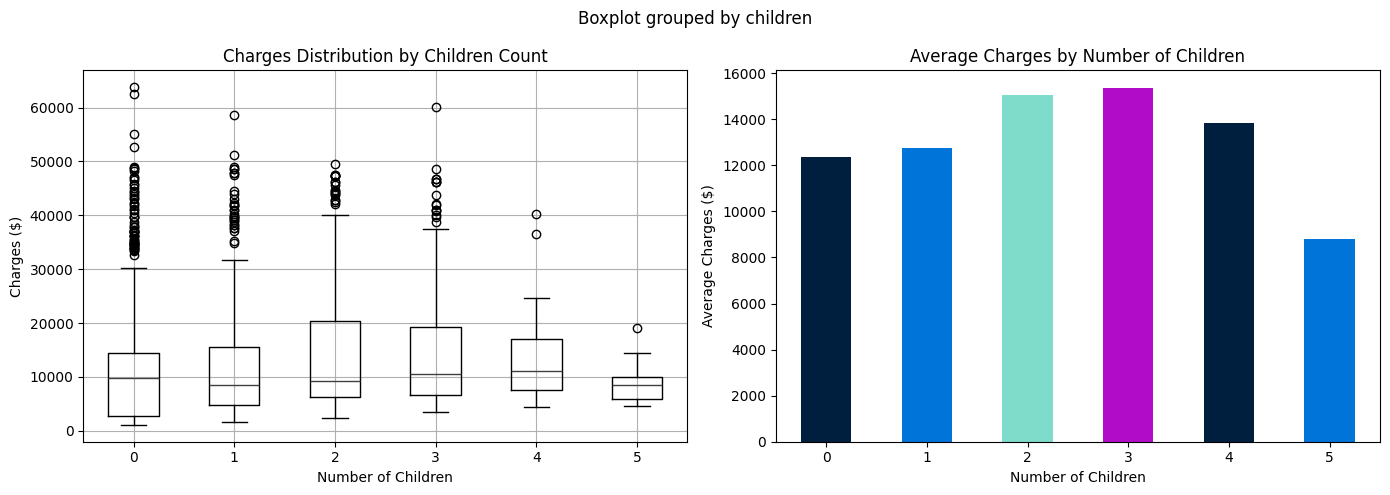

In [14]:
# Charges by Children Status
charges_by_children = df.groupby('children')['charges'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
print("Charges Summary by Number of Children:")
print(charges_by_children)
print("\n")

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df.boxplot(column='charges', by='children', ax=axes[0])
axes[0].set_title('Charges Distribution by Children Count')
axes[0].set_xlabel('Number of Children')
axes[0].set_ylabel('Charges ($)')
plt.sca(axes[0])
plt.xticks(rotation=0)

# Bar plot of average charges
avg_charges = df.groupby('children')['charges'].mean()
avg_charges.plot(kind='bar', ax=axes[1], color=custom_palette)
axes[1].set_title('Average Charges by Number of Children')
axes[1].set_xlabel('Number of Children')
axes[1].set_ylabel('Average Charges ($)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


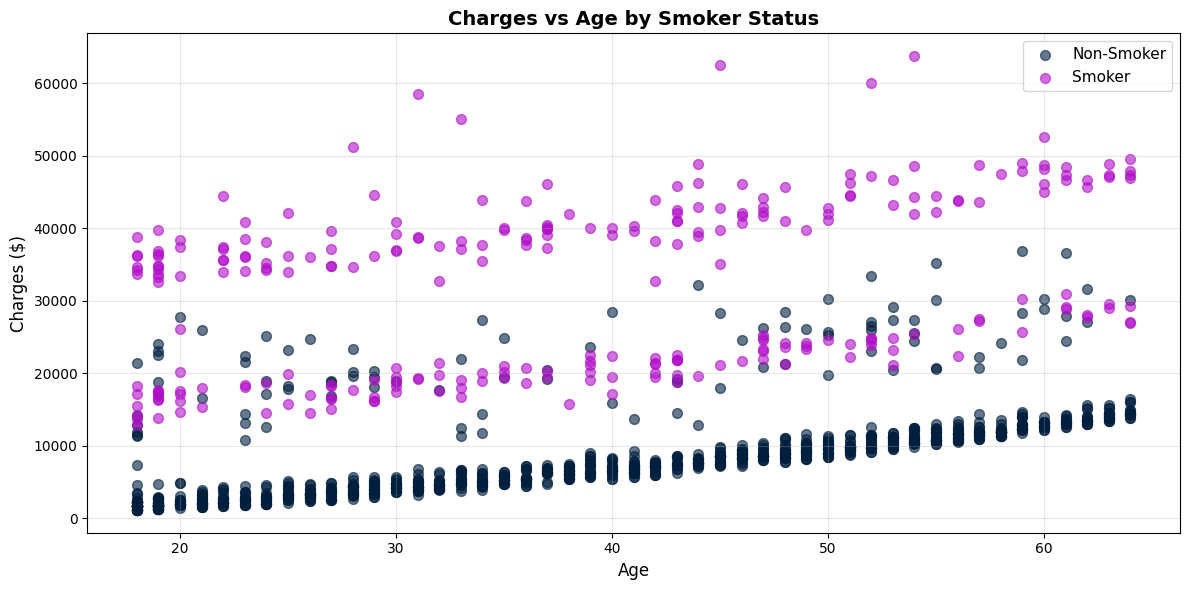

In [16]:
# Scatterplot: Age vs Charges by Smoker Status
fig = px.scatter(df, x='age', y='charges', color='smoker',
                 title='Charges vs Age by Smoker Status (Interactive)',
                 labels={'age': 'Age', 'charges': 'Charges ($)', 'smoker': 'Smoker Status'},
                 color_discrete_map={'yes': '#B10DC9', 'no': '#001f3f'},
                 hover_data=['age', 'charges', 'smoker', 'bmi', 'children'])
fig.show()

# Static matplotlib version with better styling
plt.figure(figsize=(12, 6))
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']

plt.scatter(non_smokers['age'], non_smokers['charges'], 
           alpha=0.6, s=50, label='Non-Smoker', color='#001f3f')
plt.scatter(smokers['age'], smokers['charges'], 
           alpha=0.6, s=50, label='Smoker', color='#B10DC9')

plt.title('Charges vs Age by Smoker Status', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
